### Today Topics:

* Data Preprocessing for Lable data encoding
* DecisionTree Classifier

### Lable data encoding:

* Label Encoder
* OneHotEncoding
* get_dummies()

In [2]:
import pandas as pd
import numpy as np

d={"sname":["siva","ganesh","sai","lohitha","myname"],
   "Gender":["Male","Male","Male","Female","Male"],
  
  "MarriedStatus":["Married","unmarried","unspecified","unmarried","unspecified"],
  
  "Is_Bool":["True","True","False","False","True"]}
df=pd.DataFrame(d)
df

,sname,Gender,MarriedStatus,Is_Bool
0,siva,Male,Married,True
1,ganesh,Male,unmarried,True
2,sai,Male,unspecified,False
3,lohitha,Female,unmarried,False
4,myname,Male,unspecified,True


In [3]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

labelobject=LabelEncoder()

labelobject=labelobject.fit(df['Gender'])
df['Gender']=labelobject.transform(df['Gender'])
df


,sname,Gender,MarriedStatus,Is_Bool
0,siva,1,Married,True
1,ganesh,1,unmarried,True
2,sai,1,unspecified,False
3,lohitha,0,unmarried,False
4,myname,1,unspecified,True


In [4]:
labelobject.classes_

array(['Female', 'Male'], dtype=object)

In [5]:
# Onehotencoding
from sklearn.preprocessing import OneHotEncoder

onehot=OneHotEncoder()

onehot=onehot.fit(df['MarriedStatus'].values.reshape(-1,1))

onehot.categories_



[array(['Married', 'unmarried', 'unspecified'], dtype=object)]

In [6]:
onhot_lebel=onehot.transform(df['MarriedStatus'].values.reshape(-1,1)).toarray()
onhot_lebel

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
label_df=pd.DataFrame()
label_df['Married_status_encode']=onhot_lebel[:,0]
label_df['unmarried_status_encode']=onhot_lebel[:,1]
label_df['unspecified_status_encode']=onhot_lebel[:,2]
label_df

,Married_status_encode,unmarried_status_encode,unspecified_status_encode
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [8]:
afterencode_df=pd.concat([df,label_df],axis=1)
afterencode_df

,sname,Gender,MarriedStatus,Is_Bool,Married_status_encode,unmarried_status_encode,unspecified_status_encode
0,siva,1,Married,True,1.0,0.0,0.0
1,ganesh,1,unmarried,True,0.0,1.0,0.0
2,sai,1,unspecified,False,0.0,0.0,1.0
3,lohitha,0,unmarried,False,0.0,1.0,0.0
4,myname,1,unspecified,True,0.0,0.0,1.0


In [9]:
# get_dummies

ds=pd.get_dummies(df['Is_Bool'])
ds

,False,True
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [10]:
encode_df2=pd.concat([df,ds],axis=1)
encode_df2

,sname,Gender,MarriedStatus,Is_Bool,False,True
0,siva,1,Married,True,0,1
1,ganesh,1,unmarried,True,0,1
2,sai,1,unspecified,False,1,0
3,lohitha,0,unmarried,False,1,0
4,myname,1,unspecified,True,0,1


### DecissionTree:

* We can also called as decission tree as CART(Classification and Regression Tree)

* Decision tree set up a tree structure on trainign data which helps make a decissions based on rules

In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
dia=load_iris()
dia.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [40]:
df=pd.DataFrame(dia.data,columns=dia.feature_names)
df['Target']=dia.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [41]:
X=df.drop('Target',axis=1)
y=df[['Target']]

In [42]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini')
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
model.score(X,y)*100

100.0

In [44]:
model.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [46]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
y_pred=model.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

### Decission Tree visulization

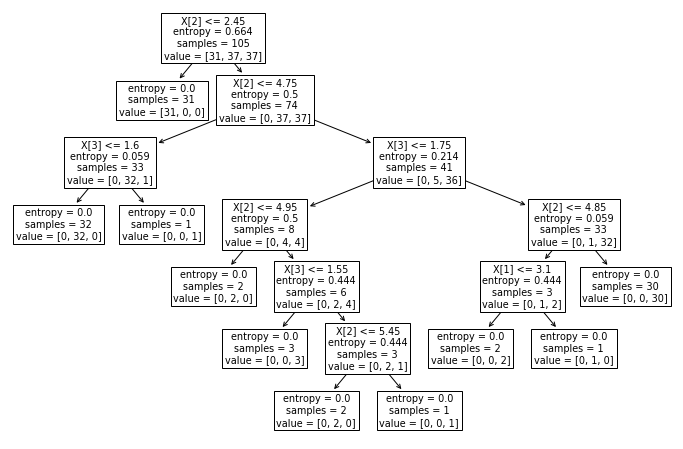

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model)
plt.show()